In [3]:
## Import the libraries required

import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Add the path to your datasets 

In [119]:
images_dir = "data"
image_files = os.listdir(images_dir)

In [318]:
!ls data

anpr.39.jpeg   anpr132.jpg    anpr17.jpg     anpr25.jpeg    anpr64.jpeg
anpr1.jpg      anpr133.jpg    anpr170.jpg    anpr26.png     anpr65.jpeg
anpr10.jpg     anpr134.jpeg   anpr171.jpeg   anpr27.jpeg    anpr66.jpeg
anpr100.jpeg   anpr135.jpeg   anpr17178.jpg  anpr28.jpeg    anpr67.jpg
anpr101.jpeg   anpr136.jpg    anpr172.jpg    anpr29.jpeg    anpr68.jpeg
anpr101.jpg    anpr137.jpg    anpr173.jpg    anpr30.jpg     anpr69.jpg
anpr102.jpg    anpr138.jpg    anpr174.jpeg   anpr31.jpeg    anpr7.jpg
anpr103.jpg    anpr139.jpg    anpr175.jpg    anpr32.jpeg    anpr70.jpeg
anpr104.jpg    anpr14.jpeg    anpr176.jpg    anpr33.jpeg    anpr71.jpg
anpr105.jpg    anpr140.jpg    anpr177.jpg    anpr34.jpg     anpr72.jpeg
anpr106.jpg    anpr141.jpg    anpr178.jpeg   anpr35.jpg     anpr73.jpeg
anpr107.jpg    anpr142.jpg    anpr179.jpg    anpr36.jpg     anpr74.jpg
anpr108.jpg    anpr143.jpg    anpr18.jpg     anpr37.jpg     anpr75.jpg
anpr109.jpg    anpr144.jpg    anpr180.jpg    anpr38.jpg     anpr76.jpg


In [320]:
#get the images from the path
image_path = "{}/{}".format(images_dir, "anpr15.jpg")


# read the images using opencv and apply gray to the images
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [295]:
## 
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)


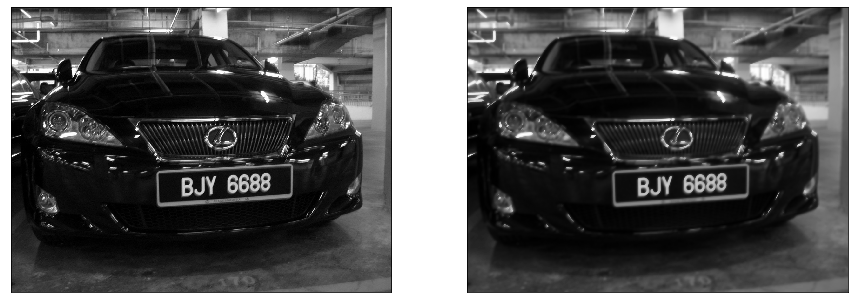

In [321]:
## plot the images into gray
plot_images(gray, blur)


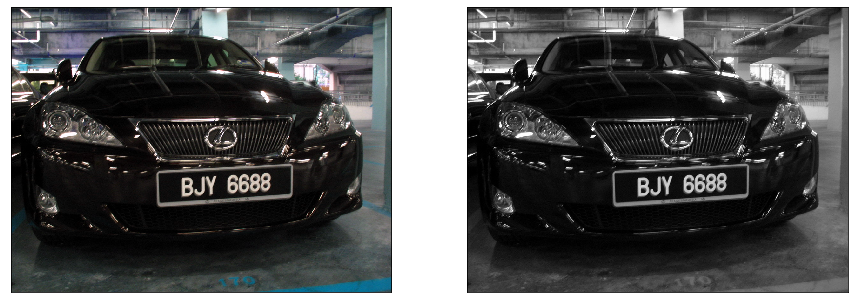

In [315]:
plot_images(image, gray)

In [323]:
## blur the images
blur = cv2.bilateralFilter(gray, 11,90, 90)

In [324]:
edges = cv2.Canny(blur, 30, 200)


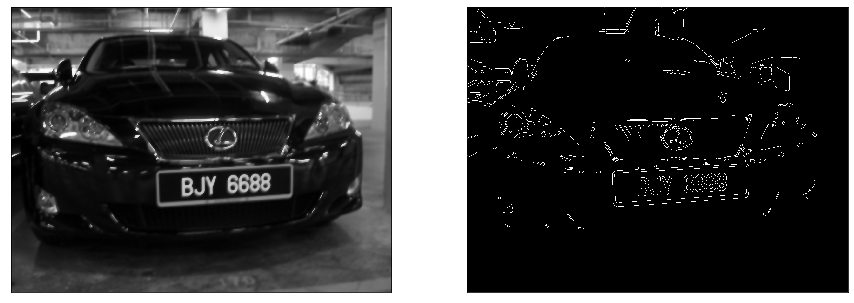

In [300]:
## get the blur images by ploting 
plot_images(blur, edges)


In [301]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


In [302]:
image_copy = image.copy()


In [303]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)


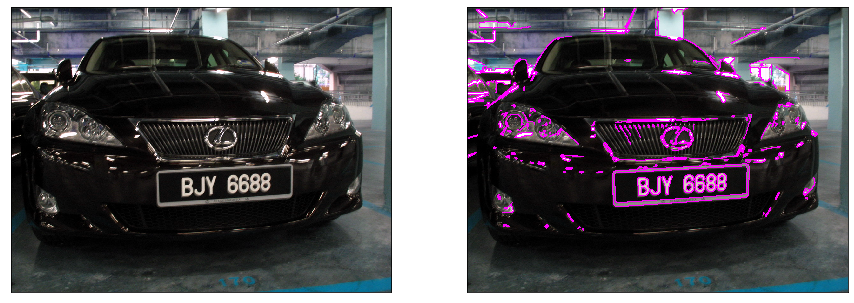

In [304]:
plot_images(image, image_copy)


In [305]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]


In [306]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

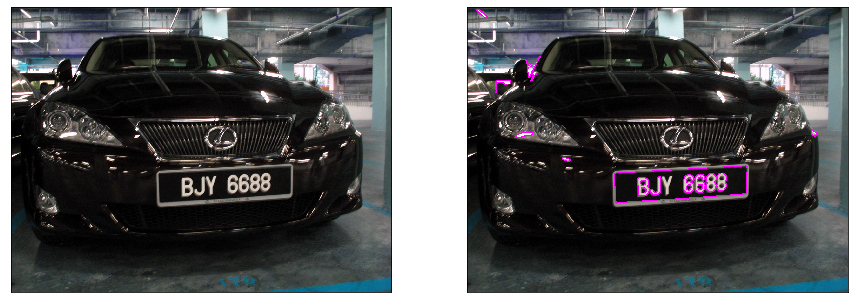

In [307]:
plot_images(image, image_copy)


In [325]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("lp.png", plate)

True

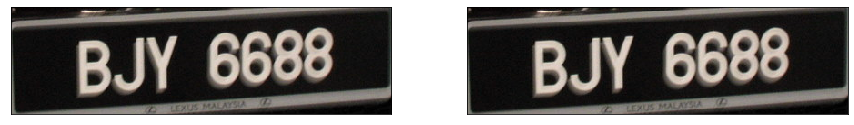

In [326]:
plot_images(plate, plate)


In [327]:
#

In [328]:
import pytesseract
text = pytesseract.image_to_string(plate, lang="eng")

In [329]:
text = pytesseract.image_to_string(plate, lang="eng")

In [330]:
print(text)

ke
